In [5]:
import yfinance as yf
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
def calculate_t_score(sample_mean, population_mean, sample_std, sample_size):
  standard_error = sample_std / np.sqrt(sample_size)
  t_score = (sample_mean - population_mean) / standard_error
  return t_score

In [7]:
def calculate_z_scores(data):
  return stats.zscore(data)

In [8]:
def calculate_confidence_interval(data, confidence=0.95):
  n = len(data)
  mean = np.mean(data)
  std_error = stats.sem(data)
  h = std_error * stats.t.ppf((1 + confidence) / 2, n - 1)
  return (mean - h, mean + h)

In [13]:
def plot_distributions(df_clean, ticker):
        plt.figure(figsize=(15, 5))

        plt.subplot(1, 3, 1)
        sns.histplot(df_clean['Volume'], kde=True)
        plt.title(f'{ticker} Daily Volume Distribution')
        plt.xlabel('Volume')
        plt.ylabel('Frequency')

        plt.subplot(1, 3, 2)
        sns.histplot(df_clean['Close'], kde=True)
        plt.title(f'{ticker} Daily Close Price Distribution')
        plt.xlabel('Close Price')
        plt.ylabel('Frequency')

        plt.subplot(1, 3, 3)
        sns.histplot(df_clean['Daily_Returns'], kde=True)
        plt.title(f'{ticker} Daily Returns Distribution')
        plt.xlabel('Daily Returns')
        plt.ylabel('Frequency')

        plt.tight_layout()
        plt.show()

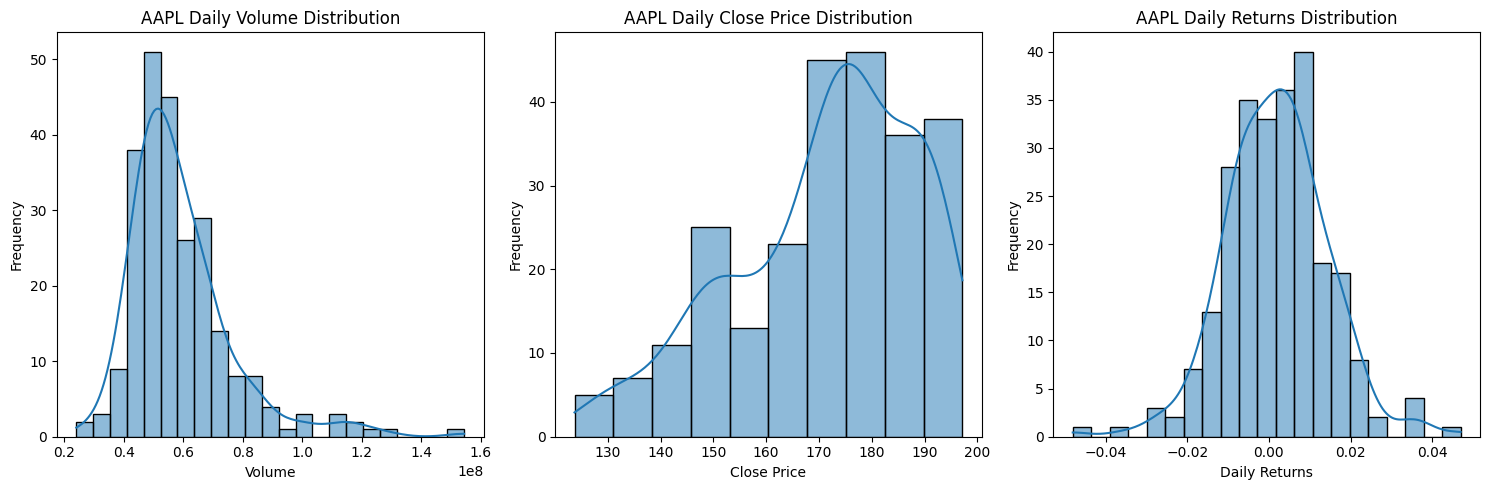


Volume Analysis:
Mean: 59004577.10843374
Standard Deviation: 17488752.646793425
T-Score: 0.0
Z-Scores: Date
2023-01-04 00:00:00-05:00    1.725090
2023-01-05 00:00:00-05:00    1.258086
2023-01-06 00:00:00-05:00    1.647232
2023-01-09 00:00:00-05:00    0.675289
2023-01-10 00:00:00-05:00    0.280264
Name: Volume, dtype: float64
Confidence Interval: (56821687.22075263, 61187466.99611485)

Close Price Analysis:
Mean: 171.4728134032713
Standard Deviation: 17.190058429041375
T-Score: 0.0
Z-Scores: Date
2023-01-04 00:00:00-05:00   -2.706290
2023-01-05 00:00:00-05:00   -2.783587
2023-01-06 00:00:00-05:00   -2.518242
2023-01-09 00:00:00-05:00   -2.487670
2023-01-10 00:00:00-05:00   -2.454212
Name: Close, dtype: float64
Confidence Interval: (169.32720556769578, 173.6184212388468)

Daily Returns Analysis:
Mean: 0.0018349276037767119
Standard Deviation: 0.012570044937722017
T-Score: 0.0
Z-Scores: Date
2023-01-04 00:00:00-05:00    0.675931
2023-01-05 00:00:00-05:00   -0.991613
2023-01-06 00:00:00-0

In [14]:
def analyze_stock_data(ticker='AAPL', start_date='2023-01-01', end_date='2024-01-01'):

    stock = yf.Ticker(ticker)
    df = stock.history(start=start_date, end=end_date)

    df['Daily_Returns'] = df['Close'].pct_change()

    df_clean = df.dropna()

    volume_mean = df_clean['Volume'].mean()
    volume_std = df_clean['Volume'].std()

    close_mean = df_clean['Close'].mean()
    close_std = df_clean['Close'].std()

    returns_mean = df_clean['Daily_Returns'].mean()
    returns_std = df_clean['Daily_Returns'].std()

    volume_t_score = calculate_t_score(volume_mean, population_mean=volume_mean,
                                        sample_std=volume_std, sample_size=len(df_clean))
    close_t_score = calculate_t_score(close_mean, population_mean=close_mean,
                                       sample_std=close_std, sample_size=len(df_clean))
    returns_t_score = calculate_t_score(returns_mean, population_mean=returns_mean,
                                         sample_std=returns_std, sample_size=len(df_clean))

    volume_z_scores = calculate_z_scores(df_clean['Volume'])
    close_z_scores = calculate_z_scores(df_clean['Close'])
    returns_z_scores = calculate_z_scores(df_clean['Daily_Returns'])

    volume_ci = calculate_confidence_interval(df_clean['Volume'])
    close_ci = calculate_confidence_interval(df_clean['Close'])
    returns_ci = calculate_confidence_interval(df_clean['Daily_Returns'])

    plot_distributions(df_clean, ticker)

    return {
        'Volume': {
            'Mean': volume_mean,
            'Standard Deviation': volume_std,
            'T-Score': volume_t_score,
            'Z-Scores': volume_z_scores[:5],
            'Confidence Interval': volume_ci
        },
        'Close Price': {
            'Mean': close_mean,
            'Standard Deviation': close_std,
            'T-Score': close_t_score,
            'Z-Scores': close_z_scores[:5],
            'Confidence Interval': close_ci
        },
        'Daily Returns': {
            'Mean': returns_mean,
            'Standard Deviation': returns_std,
            'T-Score': returns_t_score,
            'Z-Scores': returns_z_scores[:5],
            'Confidence Interval': returns_ci
        }
    }

# Example usage
if __name__ == '__main__':
    # Analyze Apple (AAPL) stock data
    results = analyze_stock_data()

    # Print results
    for key, value in results.items():
        print(f"\n{key} Analysis:")
        for metric, stat in value.items():
            print(f"{metric}: {stat}")